# MSP projekt Matej Mištík

In [796]:
import pandas as pd
from scipy import stats

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_excel('./MSP_Projekt_2022-23_Zadani_St_8 (1).xlsx', sheet_name='Úkol 1')
df = df.dropna()
df = df.rename(columns={'Unnamed: 0': ''})
df2 = df.copy() 
#
# merge columns of Praha and Brno

df2['Praha'] = df2['Praha'].astype(int)
df2['Brno'] = df2['Brno'].astype(int)
df2['Praha'] = df2['Praha'] + df2['Brno']
df2 = df2.drop(columns=['Brno'])
df2 = df2.rename(columns={'Praha': 'Vetsi_mesta'})

# merge columns of Znojmo Tišnov

df2['Znojmo'] = df2['Znojmo'].astype(int)
df2['Tišnov'] = df2['Tišnov'].astype(int)
df2['Znojmo'] = df2['Znojmo'] + df2['Tišnov']
df2 = df2.drop(columns=['Tišnov'])
df2 = df2.rename(columns={'Znojmo': 'Mala_mesta'})

# merge forth, fifth, sixth column

df2['Rokytnice nad Jizerou'] = df2['Rokytnice nad Jizerou'].astype(int)
df2['Jablunkov'] = df2['Jablunkov'].astype(int)
df2['Dolní Věstonice'] = df2['Dolní Věstonice'].astype(int)
df2['Rokytnice nad Jizerou'] = df2['Rokytnice nad Jizerou'] + df2['Jablunkov'] + df2['Dolní Věstonice']
df2 = df2.drop(columns=['Jablunkov', 'Dolní Věstonice'])
df2 = df2.rename(columns={'Rokytnice nad Jizerou': 'obce'})

In [797]:
print('Datova sada, s ktorou budeme pracovať v ulohách 1a až 1c:')
df

Datova sada, s ktorou budeme pracovať v ulohách 1a až 1c:


,,Praha,Brno,Znojmo,Tišnov,Rokytnice nad Jizerou,Jablunkov,Dolní Věstonice,okolí studenta
0,počet respondentů,1327.0,915.0,681.0,587.0,284.0,176.0,215.0,20.0
1,zimní čas,510.0,324.0,302.0,257.0,147.0,66.0,87.0,4.0
2,letní čas,352.0,284.0,185.0,178.0,87.0,58.0,65.0,9.0
3,střídání časů,257.0,178.0,124.0,78.0,44.0,33.0,31.0,4.0
4,nemá názor,208.0,129.0,70.0,74.0,6.0,19.0,32.0,2.0


In [798]:
print('Datova sada, s ktorou budeme pracovať v ulohách 1d až 1f:')
df2

Datova sada, s ktorou budeme pracovať v ulohách 1d až 1f:


,,Vetsi_mesta,Mala_mesta,obce,okolí studenta
0,počet respondentů,2242,1268,675,20.0
1,zimní čas,834,559,300,4.0
2,letní čas,636,363,210,9.0
3,střídání časů,435,202,108,4.0
4,nemá názor,337,144,57,2.0


# BOD 1

## Hypotézy

### 1.a

H0 : percentuálne zastúpenie obyvateľov pre zimný čas je rovnaký pre vsetky mesta
H1 : percentuálne zastúpenie obyvateľov pre zimný čas je rôzny pre vsetky mesta

### 1.b

H0 : percentuálne zastúpenie obyvateľov pre letný čas je rovnaký pre všetky mestá
H1 : percentuálne zastúpenie obyvateľov pre letný čas je rôzny pre všetky mestá

### 1.c

H0 : percentuálne zastúpenie obyvateľov pre striedanie časov je rovnaký pre všetky mestá
H1 : percentuálne zastúpenie obyvateľov pre striedanie časov je rôzny pre všetky mestá

In [799]:
# A - zimny, B - letny , C - striedanie casov

alpha = 0.05

# sum of first row

sumForEveryRow = df.sum(axis=1,numeric_only=True)
print('SUM of every row:')
print(sumForEveryRow)
print('------------------------------------')

# create variable for p1, p2 in cycle

# cycle trough list of sumForEveryRow
optionsList = ['A','B','C']
for i in range(1,4):
    print('Option:',optionsList[i-1])
    p = sumForEveryRow[i]/ sumForEveryRow[0]
    print('probability:',p)
    values = df.iloc[0,1:].values

    print('Observed frequencies in each category:',values)
    # create list of expected values for every column

    expectedValues = []
    for j in range(0,8):
        expectedValues.append(values[j] * p)
    print('Expected frequencies in each category:',expectedValues)


    T, p = stats.chisquare(f_obs = df.iloc[i].values[1:,], f_exp = expectedValues,ddof=1)
    
    print('chisq:',T)
    print('The p-value of the test:',p)
    print('H0 is rejected' if p < alpha else 'H0 is not rejected')
    print('------------------------------------')

SUM of every row:
0    4205.0
1    1697.0
2    1218.0
3     749.0
4     540.0
dtype: float64
------------------------------------
Option: A
probability: 0.4035671819262782
Observed frequencies in each category: [1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
Expected frequencies in each category: [535.5336504161712, 369.2639714625446, 274.8292508917955, 236.89393579072532, 114.61307966706302, 71.02782401902496, 86.76694411414982, 8.071343638525564]
chisq: 22.720476798835556
The p-value of the test: 0.0008957117744714648
H0 is rejected
------------------------------------
Option: B
probability: 0.2896551724137931
Observed frequencies in each category: [1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
Expected frequencies in each category: [384.3724137931035, 265.0344827586207, 197.25517241379313, 170.02758620689656, 82.26206896551724, 50.97931034482759, 62.27586206896552, 5.793103448275863]
chisq: 8.3529705718337
The p-value of the test: 0.2133672661064076
H0 is not rejected
---------

## Vyhotovenie Hypotéz

### 1.a
H0 : percentuálne zastúpenie obyvateľov pre zimný čas je rovnaký pre všetky mestá - zamieta sa

### 1.b

H0 : percentuálne zastúpenie obyvateľov pre letný čas je rovnaký pre všetky mestá - nezamieta sa

### 1.c

H0 : percentuálne zastúpenie obyvateľov pre striedanie časov je rovnaký pre všetky mestá - nezamieta sa


## Hypotézy D, E

### 1.d

H0 : percentuálne zastúpenie obyvateľov pre zimný čas je rovnaký pre vsetky zastúpenie miest
H1 : percentuálne zastúpenie obyvateľov pre zimný čas je rôzny pre vsetky zastúpenie miest

### 1.e

H0 : percentuálne zastúpenie nerozhodnutných obyvateľov je rovnaký pre všetky zastúpenie miest
H1 : percentuálne zastúpenie nerozhodnutných obyvateľov je rôzny pre všetky zastúpenie miest

In [800]:
#D, E nova tabula bez okolia studenta , len 3 hodnoty

# sum of first row

sumForEveryRow = df2.sum(axis=1,numeric_only=True)
print('SUM of every row:')
print(sumForEveryRow)
print('------------------------------------')

# create variable for p1, p2 in cycle

# cycle trough list of sumForEveryRow
x = [1,4] # zimny cas a nema nazor
optionsList = ['D','','','E']
for i in x:
    print('Option:',optionsList[i-1])
    p = sumForEveryRow[i]/ sumForEveryRow[0]
    print('probability:',p)
    values = df.iloc[0,1:].values

    print('Observed frequencies in each category:',values)
    # create list of expected values for every column

    expectedValues = []
    for j in range(0,8):
        expectedValues.append(values[j] * p)
    print('Expected frequencies in each category:',expectedValues)


    T, p = stats.chisquare(f_obs = df.iloc[i].values[1:,], f_exp = expectedValues,ddof=1)
    
    print('chisq:',T)
    print('The p-value of the test:',p)
    print('H0 is rejected' if p < alpha else 'H0 is not rejected')
    print('------------------------------------')

SUM of every row:
0    4205.0
1    1697.0
2    1218.0
3     749.0
4     540.0
dtype: float64
------------------------------------
Option: D
probability: 0.4035671819262782
Observed frequencies in each category: [1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
Expected frequencies in each category: [535.5336504161712, 369.2639714625446, 274.8292508917955, 236.89393579072532, 114.61307966706302, 71.02782401902496, 86.76694411414982, 8.071343638525564]
chisq: 22.720476798835556
The p-value of the test: 0.0008957117744714648
H0 is rejected
------------------------------------
Option: E
probability: 0.12841854934601665
Observed frequencies in each category: [1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
Expected frequencies in each category: [170.4114149821641, 117.50297265160523, 87.45303210463734, 75.38168846611177, 36.47086801426873, 22.60166468489893, 27.60998810939358, 2.568370986920333]
chisq: 39.78016680405891
The p-value of the test: 5.031424182862881e-07
H0 is rejected
--------

## Vyhodnotenie Hypotéz

### 1.d

H0 : percentuálne zastúpenie obyvateľov pre zimný čas je rovnaký pre vsetky zastúpenie miest - zamieta sa

### 1.e

H0 : percentuálne zastúpenie nerozhodnutných obyvateľov je rovnaký pre všetky zastúpenie miest - zamieta sa


## Hypotéza F pre alfa = 0.1

### 1.f

H0 : Okolie študenta je podobné veľkým mestám
H1 : Okolie študenta je podobné malým mestám
H2 : Okolie študenta je podobné obciam


In [801]:
df2

,,Vetsi_mesta,Mala_mesta,obce,okolí studenta
0,počet respondentů,2242,1268,675,20.0
1,zimní čas,834,559,300,4.0
2,letní čas,636,363,210,9.0
3,střídání časů,435,202,108,4.0
4,nemá názor,337,144,57,2.0


In [802]:
sumForEveryRow = df2.sum(axis=1,numeric_only=True)
print('SUM of every row:')
print(sumForEveryRow)
print('------------------------------------')

# create variable for p1, p2 in cycle

# cycle trough list of sumForEveryRow
alpha = 0.1
for i in range(1,4):
    p = sumForEveryRow[i]/ sumForEveryRow[0]
    print('probability:',p)
    values = df.iloc[0,1:].values

    print(values)
    # create list of expected values for every column

    expectedValues = []
    for j in range(0,8):
        expectedValues.append(values[j] * p)
    print(expectedValues)


    T, p = stats.chisquare(f_obs = df.iloc[i].values[1:,], f_exp = expectedValues,ddof=1)
    
    print('chisq:',T)
    print('The p-value of the test:',p)
    print('H{} is rejected'.format(i) if p < alpha else 'H{} is not rejected'.format(i))
    print('------------------------------------')

SUM of every row:
0    4205.0
1    1697.0
2    1218.0
3     749.0
4     540.0
dtype: float64
------------------------------------
probability: 0.4035671819262782
[1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[535.5336504161712, 369.2639714625446, 274.8292508917955, 236.89393579072532, 114.61307966706302, 71.02782401902496, 86.76694411414982, 8.071343638525564]
chisq: 22.720476798835556
The p-value of the test: 0.0008957117744714648
H1 is rejected
------------------------------------
probability: 0.2896551724137931
[1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[384.3724137931035, 265.0344827586207, 197.25517241379313, 170.02758620689656, 82.26206896551724, 50.97931034482759, 62.27586206896552, 5.793103448275863]
chisq: 8.3529705718337
The p-value of the test: 0.2133672661064076
H2 is not rejected
------------------------------------
probability: 0.17812128418549347
[1327.0 915.0 681.0 587.0 284.0 176.0 215.0 20.0]
[236.36694411414985, 162.98097502972652, 121.30059453032105, 104.

## Vyhodnotenie Hypotézy F

### 1.f

H0 : Okolie študenta je podobné veľkým mestám - zamieta sa
H1 : Okolie študenta je podobné malým mestám - nezamieta sa
H2 : Okolie študenta je podobné obciam - zamieta sa

Okolie študenta je **podobné malým mestám**

# BOD 2

In [803]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

data = pd.read_excel('./MSP_Projekt_2022-23_Zadani_St_8 (1).xlsx', sheet_name='Úkol 2 - Data')
xi = np.array(pd.DataFrame(data, columns=['xi']))
yi = np.array(pd.DataFrame(data,columns=['yi']))
zi = np.array(pd.DataFrame(data,columns=['zi']))
xi = xi.ravel()
yi = yi.ravel()
zi = zi.ravel()

## 2.a

### Určenie vhodného modelu

In [804]:
#ANOVA
model = ols('zi ~ yi + I(yi**2) + xi + I(xi**2) + (xi*yi)',data = data).fit()
at = sm.stats.anova_lm(model,typ=2)
print(at)
print(model.summary())
model.pvalues
for i in range(0,6):
    print('H{} is rejected'.format(i) if model.pvalues[i] < 0.05 else 'H{} is not rejected'.format(i))

                   sum_sq    df         F    PR(>F)
yi            7055.714163   1.0  0.717120  0.400246
I(yi ** 2)   25369.316298   1.0  2.578454  0.113251
xi           10197.367669   1.0  1.036427  0.312487
I(xi ** 2)   32371.389818   1.0  3.290122  0.074386
xi:yi         8469.528042   1.0  0.860815  0.356997
Residual    629693.666965  64.0       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:                     zi   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     17.64
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           6.00e-11
Time:                        16:07:08   Log-Likelihood:                -417.98
No. Observations:                  70   AIC:                             848.0
Df Residuals:                      64   BIC:                             861.5
Df M

## Zjednodušenie na submodel odobratím dvoch najväčších hodnôt na základe hypotéz

Pre nasledovný submodel vyšiel R-squared najlepšie a bol vybraný ako submodel pre nasledovné úlohy

In [807]:
# odhad regresnich parametru je u koeficinetu posledni dva sloupce.
F = np.column_stack((xi**2, yi**2,xi))
F = sm.add_constant(F)
y = zi
model = sm.OLS(y, F).fit()
print(model.summary())
chosen_model = model
koefs = model.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     29.06
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           4.29e-12
Time:                        16:07:09   Log-Likelihood:                -418.84
No. Observations:                  70   AIC:                             845.7
Df Residuals:                      66   BIC:                             854.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1528     31.853     -0.350      0.7

## 2.b

### Intervalové odhady

| [0.025  | 0.975]| 
|---------|-------|
| -74.750 | 52.444| 
| -0.058  | 1.257 |
| -3.661  | -2.301|
| -20.648 | 6.673 |

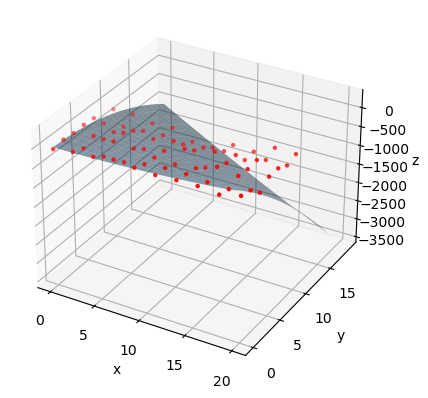

In [808]:
XY = np.vstack((xi, yi)).T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, marker='.', color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(XY)
model = LinearRegression()
model.fit(X_poly, zi)
xs = np.tile(np.arange(20), (20,1))
ys = np.tile(np.arange(20), (20,1)).T
zs = xs**2*koefs[1]+ys**2*koefs[2]+xs*ys*koefs[3]+koefs[0]
ax.plot_surface(xs,ys,zs, alpha=0.5)
plt.show()

## Nestranne odhadovaný rozptyl závislej premennej

### 2.c


In [809]:
print('nestranny odhadovany rozptyl:',chosen_model.mse_resid)

nestranny odhadovany rozptyl: 9776.04407832675


## Hypotéza D pre alfa = 0.05

### 2.d

H0: x1 = 0 a x2 = 0

H1: x1 != 0 alebo x2 != 0

In [810]:
#d.) test na nulovost koeficientu
print('Konstanta: ',koefs[0])
print('xi**2: ',koefs[1]) # xi**2
print('yi**2: ',koefs[2]) # yi**2
print('xi*yi: ',koefs[3]) # xi*yi
h = 'x1 = 0 , x2 = 0'
F_test = chosen_model.f_test(h)
print('d.)',F_test)
print('p-value:',F_test.pvalue)
print('H0 is rejected' if F_test.pvalue < alpha else 'H0 is not rejected')

Konstanta:  -11.152794372294245
xi**2:  0.5992937094155928
yi**2:  -2.980840219780214
xi*yi:  -6.987893668831333
d.) <F test: F=39.947105132543214, p=4.282466514301482e-12, df_denom=66, df_num=2>
p-value: 4.282466514301482e-12
H0 is rejected


## Hypotéza D pre alfa = 0.05

### 2.d

H0: x1 = 0 a x2 = 0 - zamieta sa

## Hypotéza E pre alfa = 0.05

### 2.e

H0: x1 = x2

H1: x1 != x2

In [811]:
#e.) test na rovnost koeficientu
h2 = 'x1 = x2'
T_test = chosen_model.t_test(h2,use_t=True)
print('e.)',T_test)
T_test.pvalue
print('p-value: ',T_test.pvalue)
print('H0 is rejected' if T_test.pvalue < 0.05 else 'H0 is not rejected')

e.)                              Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             3.5801      0.474      7.556      0.000       2.634       4.526
p-value:  1.648517238113275e-10
H0 is rejected


## Hypotéza E pre alfa = 0.05

### 2.e

H0: x1 = x2 - zamieta sa